## Three Observations or Influences:
### 1. From the 'bar charts', we can infer that most of the mice reacted to 'Capomulin' and 'Ramicane'.
### 2. From the 'bar charts', we can infer that the mice reacted least to 'Propriva'.
### 3. From the 'pie chart', we can deduce that almost same  number of male and female mice reacted to the drug regimen.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata,study_results)

renamed_merged_data = merged_data.rename(columns={"Age_months":"Age (months)", "Weight (g)":"Weight (grams)"})

# Display the data table for preview
display(renamed_merged_data)

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (grams),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check and count the number of mice with their ID
no_mices = dict.fromkeys(merged_data["Mouse ID"])
print('Total number of mice =', len(no_mices))

Total number of mice = 249


In [3]:
# Get the duplicate data for mice by ID number that shows up for Mouse ID and Timepoint
duplicated_data = merged_data[merged_data.duplicated(subset = ['Mouse ID', 'Timepoint'], keep='first')]
renamed_duplicated_data = duplicated_data.rename(columns = {"Age_months":"Age (months)", "Weight (g)":"Weight (grams)"})

# Drop duplicates with two levels
# Look for duplicates in group of Mouse ID and drop duplicate that is repeated with Timepoint in each Mouse ID
# We get clean data which we will use for rest of this development
clean_data = merged_data.drop_duplicates(subset = ['Mouse ID','Timepoint'], keep='last')
renamed_clean_data = clean_data.rename(columns = {"Age_months":"Age (months)", "Weight (g)":"Weight (grams)"})

display(renamed_duplicated_data)
display(renamed_clean_data)

'Source: https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/'

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (grams),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


,Mouse ID,Drug Regimen,Sex,Age (months),Weight (grams),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


'Source: https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/'

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_data_mouse_id = merged_data.drop_duplicates(subset=['Mouse ID'], keep='first')
renamed_clean_data_mouse_id = clean_data.rename(columns = {"Age_months":"Age (months)", "Weight (g)":"Weight (grams)"})
display(renamed_clean_data_mouse_id)

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (grams),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Check the number of mice in the clean DataFrame
no_of_mices = len(clean_data_mouse_id)
print('Total number of mice =', (no_of_mices))

Total number of mice = 249


In [6]:
# Generate a table of Mean, Median, Variance, Standard Deviation and SEM of the tumor volume for each regimen
# This is the most straighforward method, creating multiple series and putting them all together in the end
mean_regimen = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
med_regimen = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_regimen = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_regimen = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_regimen = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

analysis_regimen = pd.DataFrame({'Mean':mean_regimen})
analysis_regimen['Mean'] = mean_regimen
analysis_regimen['Median'] = med_regimen
analysis_regimen['Variance'] = var_regimen
analysis_regimen['Standard Deviation'] = std_regimen
analysis_regimen['SEM'] = sem_regimen

display(analysis_regimen)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Summary Statistics

In [7]:
# Generate a Summary Statistics table of Mean, Median, Variance, Standard Deviation and SEM of the tumor volume for each regimen
# Utilize 'pd.df.agg' function. This method produces everything in a single 'groupby' function

analysis_regimen_1 = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Renaming column headings
renamed_analysis_regimen_df = analysis_regimen_1.rename(columns={"mean":"Mean", "median":"Median", "var":"Variance", "std":"Standard Deviation", "sem":"SEM"})

# Re-arranging colulmns
# renamed_analysis_regimen_df = renamed_analysis_regimen_df[['Mean','Median','Variance','Standard Deviation','SEM']]
display(renamed_analysis_regimen_df)

'Source: https://stackoverflow.com/questions/26599347/groupby-pandas-dataframe-and-calculate-mean-and-stdev-of-one-column-and-add-the'

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


'Source: https://stackoverflow.com/questions/26599347/groupby-pandas-dataframe-and-calculate-mean-and-stdev-of-one-column-and-add-the'

## Bar and Pie Charts

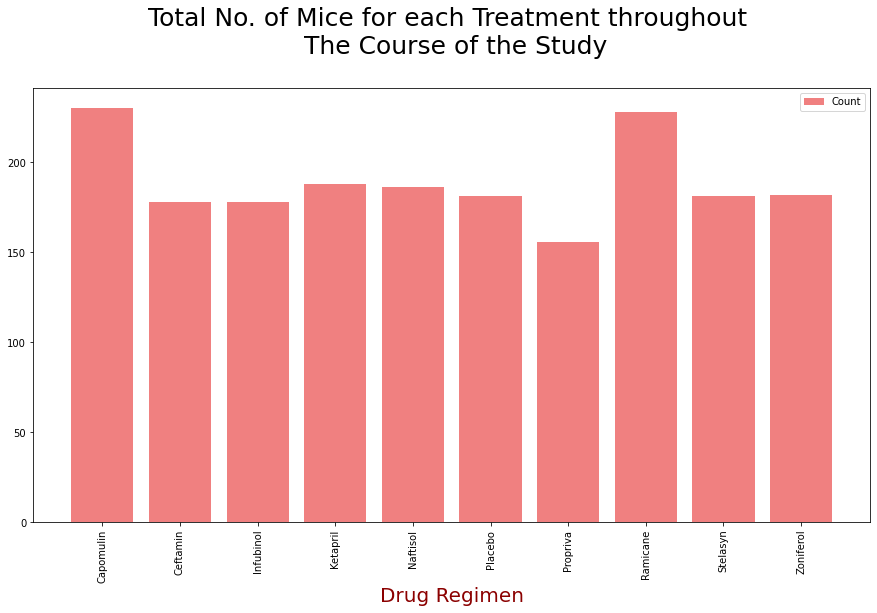

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using 'pyplot'
# The following line is allowing the graphs to be shown on the notebook
%matplotlib inline
regiment_count = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()
plt.figure(figsize = (15,8))
plt.bar(regiment_count.keys(), list(regiment_count), width=0.8, color = "lightcoral")
plt.xticks(regiment_count.keys(), fontsize = 10, rotation = 'vertical')
plt.xlabel('Drug Regimen', fontsize = 20, c = 'darkred')
plt.title('Total No. of Mice for each Treatment throughout \n The Course of the Study'"\n", size = 25)
plt.legend(['Count'])
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

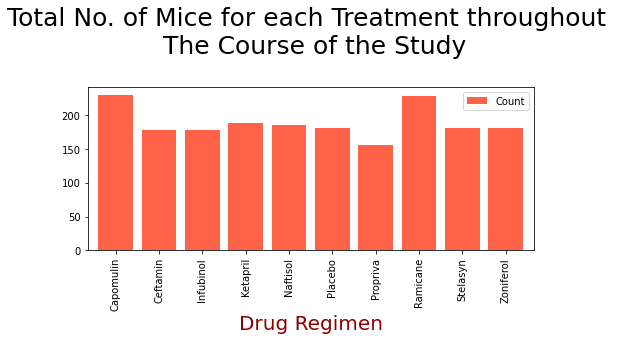

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using 'Pandas'
pd.DataFrame({'Count':regiment_count}).plot(kind = 'bar', color = "tomato", fontsize = 10, width = 0.8, figsize = (8,3))

# 'Bar Plot' formatting
plt.title('Total No. of Mice for each Treatment throughout \n The Course of the Study'"\n", size = 25)
plt.xlabel('Drug Regimen', fontsize = 20, c = 'darkred')
plt.xticks(fontsize = 10, rotation = 'vertical')

<Figure size 432x288 with 0 Axes>

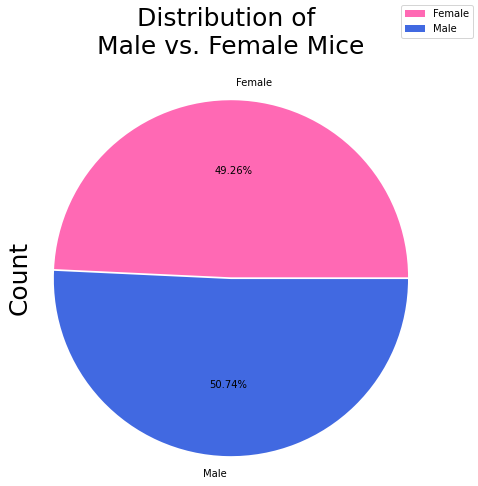

'Source: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py'

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using 'pyplot'
gender_dist = clean_data.groupby('Sex')['Mouse ID'].count()
plt.figure()

fig1, ax1 = plt.subplots(figsize = (7,7))
explode = [0,0.01]
ax1.pie(list(gender_dist), explode=explode, labels=gender_dist.keys(), shadow=False, startangle = 0, autopct = '%.2f%%', colors = ['hotpink','royalblue'])

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Distribution of \n Male vs. Female Mice \n', size = 25)
plt.ylabel('Count', c = 'black', fontsize = 25)
fig1.legend(gender_dist.keys())
plt.show()

'Source: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py'

'Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html'

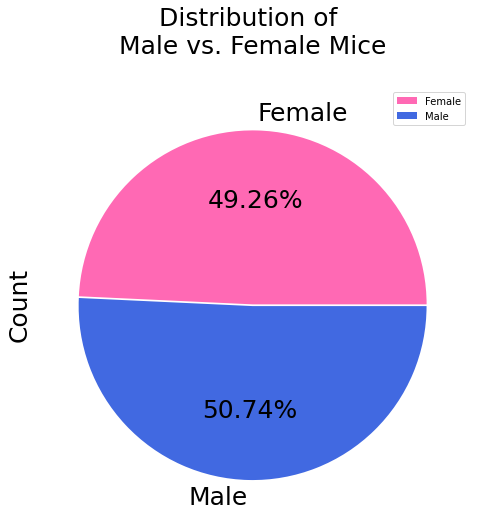

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using 'Pandas'
explode = [0,0.01]
pd.DataFrame({'Count':gender_dist}).plot(kind = 'pie', subplots = True, figsize = (8,8), explode = explode, autopct = '%.2f%%', fontsize = 25, colors = ['hotpink','royalblue'])
plt.title('Distribution of \n Male vs. Female Mice \n', size = 25)
plt.ylabel('Count', c = 'black', fontsize = 25)

'Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html'

## Quartiles, Outliers and Boxplots

In [12]:
# Put treatments into a list for 'for' loop, and later for plot labels
treatments_list = list(clean_data['Drug Regimen'].drop_duplicates())

# Create empty list to fill with tumor volume data for plotting
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
q1 = clean_data['Tumor Volume (mm3)'].quantile(0.25)
q3 = clean_data['Tumor Volume (mm3)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print('IQR: ',iqr)
print('Upper Bound: ', upper_bound)
print('Lower Bound: ', lower_bound)
print('First Quartile (Q1): ', q1)
print('Third Quartile (Q3): ', q3)
check_outliers = (clean_data['Tumor Volume (mm3)'] < (q1 - 1.5 * iqr)) | (clean_data['Tumor Volume (mm3)'] > (q3 + 1.5 * iqr))

results_list1 = ['IQR', 'Lower Bound', 'Upper Bound', 'First Quartile', 'Third Quartile']
results_list2 = [iqr, lower_bound, upper_bound, q1, q3]
display(pd.DataFrame(zip(results_list1, results_list2), columns = ['Metric', 'Value']).set_index(['Metric', 'Value']))

# Locate the rows which contain mice on each drug and get the tumor volumes
outliers_index = clean_data['Tumor Volume (mm3)'][check_outliers].index
outliers_data = clean_data.loc[outliers_index]
print("\n"'Outlier Determined by IQR')
renamed_outliers_data = outliers_data.rename(columns={"Age_months":"Age (months)", "Weight (g)":"Weight (grams)"})
display(renamed_outliers_data)

# Determine outliers using upper and lower bounds
qq1 = clean_data['Tumor Volume (mm3)'].quantile(0.1)
qq2 = clean_data['Tumor Volume (mm3)'].quantile(0.9)
outlier_up_low = (clean_data['Tumor Volume (mm3)'] < qq1) | (clean_data['Tumor Volume (mm3)'] > qq2)
outliers_ul_index = clean_data['Tumor Volume (mm3)'][outlier_up_low].index
outliers_ul_data = clean_data.loc[outliers_ul_index]
print('Outlier Determined by Upper-Lower bounds')

renamed_outliers_ul_data = outliers_ul_data.rename(columns = {"Age_months":"Age (months)", "Weight (g)":"Weight (grams)"})
display(renamed_outliers_ul_data)

'Source: https://www.pluralsight.com/guides/cleaning-up-data-from-outliers'

IQR:  11.324075107499993
Upper Bound:  73.31018776874998
Lower Bound:  28.01388733875001
First Quartile (Q1):  45.0
Third Quartile (Q3):  56.32407510749999


,
Metric,Value
IQR,11.324075
Lower Bound,28.013887
Upper Bound,73.310188
First Quartile,45.000000
Third Quartile,56.324075



Outlier Determined by IQR


,Mouse ID,Drug Regimen,Sex,Age (months),Weight (grams),Timepoint,Tumor Volume (mm3),Metastatic Sites
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
567,a818,Naftisol,Female,12,28,45,74.997764,2
679,c402,Stelasyn,Female,1,27,45,74.040390,3
850,f545,Zoniferol,Female,20,26,45,73.324432,1
930,h246,Ketapril,Male,13,30,45,74.104086,2
1043,k382,Ketapril,Male,22,29,45,73.715619,4


Outlier Determined by Upper-Lower bounds


,Mouse ID,Drug Regimen,Sex,Age (months),Weight (grams),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


'Source: https://www.pluralsight.com/guides/cleaning-up-data-from-outliers'

In [13]:
# Calculate final Tumor Volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol and Ceftamin
regiment_grouped = clean_data.groupby('Drug Regimen')
get_groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
regiment_grouped_ext = pd.concat([regiment_grouped.get_group(name) for name in get_groups])
regiment_grouped_ext_idg = regiment_grouped_ext.groupby('Mouse ID')
final_data_points = regiment_grouped_ext.loc[regiment_grouped_ext_idg['Timepoint'].idxmax()]
display(final_data_points[['Mouse ID', 'Tumor Volume (mm3)']])

# Merge this group dataframe with the original dataframe to get the tumor volume at the last Timepoint
# Prepare final column of Tumor Volume to be appended with dataframe
final_vols = list(final_data_points['Tumor Volume (mm3)'])
groupeby_mouse_cnt = regiment_grouped_ext_idg['Timepoint'].count()
final_tv_col = []
a = 0
for j in groupeby_mouse_cnt:
    for k in range(j):
        final_tv_col.append(final_vols[a])
    a+=1
regiment_grouped_ext['Final Tumor Volume (mm3)'] = final_tv_col
renamed_regiment_grouped_ext = regiment_grouped_ext.rename(columns={"Age_months":"Age (months)", "Weight (g)":"Weight (grams)"})
display(renamed_regiment_grouped_ext)

'Source: https://github.com/pandas-dev/pandas/issues/28298'

,Mouse ID,Tumor Volume (mm3)
463,a203,67.973419
473,a251,65.525743
493,a275,62.999356
327,a411,38.407618
430,a444,43.047543
...,...,...
1845,y769,68.594745
124,y793,31.896238
1855,y865,64.729837
84,z578,30.638696


,Mouse ID,Drug Regimen,Sex,Age (months),Weight (grams),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume (mm3)
10,s185,Capomulin,Female,3,17,0,45.000000,0,67.973419
11,s185,Capomulin,Female,3,17,5,43.878496,0,67.973419
12,s185,Capomulin,Female,3,17,10,37.614948,0,67.973419
13,s185,Capomulin,Female,3,17,15,38.177232,0,67.973419
14,s185,Capomulin,Female,3,17,20,36.866876,0,67.973419
...,...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2,62.754451
1852,y865,Ceftamin,Male,23,26,30,59.033275,3,62.754451
1853,y865,Ceftamin,Male,23,26,35,61.153140,3,62.754451
1854,y865,Ceftamin,Male,23,26,40,63.469549,3,62.754451


'Source: https://github.com/pandas-dev/pandas/issues/28298'

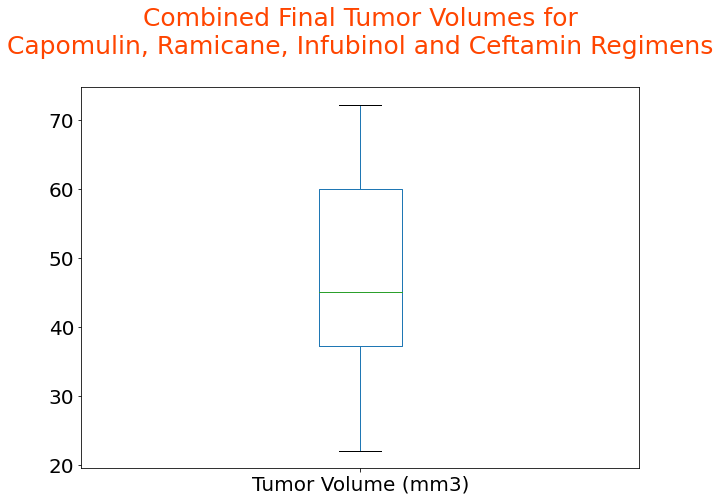

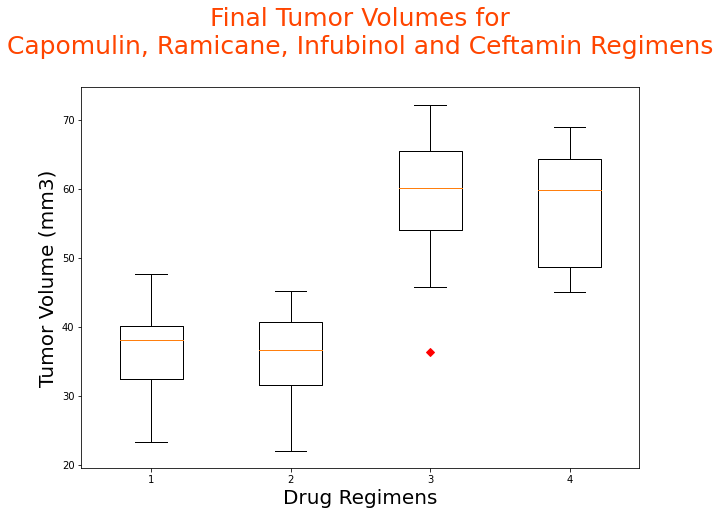

'Source: https://www.pluralsight.com/guides/cleaning-up-data-from-outliers; https://www.pluralsight.com/guides/cleaning-up-data-from-outliers'

In [14]:
# Generate a combined box plot of Final Tumor Volume
plt.title('Combined Final Tumor Volumes for'"\n"'Capomulin, Ramicane, Infubinol and Ceftamin Regimens'"\n", size = 25, color = "orangered")
final_data_points['Tumor Volume (mm3)'].plot(kind='box', figsize = (10, 7), fontsize = 20)

# Generate a box plot of Final Tumor Volume for each mouse across four regimens of interest
final_data_points_gp = final_data_points.groupby('Drug Regimen')
get_groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

capomulin_ftv = final_data_points_gp.get_group('Capomulin')
ramicane_ftv = final_data_points_gp.get_group('Ramicane')
infubinol_ftv = final_data_points_gp.get_group('Infubinol')
ceftamin_ftv = final_data_points_gp.get_group('Ceftamin')

plt.figure(figsize = (10,7))
plt.boxplot([capomulin_ftv['Tumor Volume (mm3)'], ramicane_ftv['Tumor Volume (mm3)'], infubinol_ftv['Tumor Volume (mm3)'], ceftamin_ftv['Tumor Volume (mm3)']], 0, 'rD')
plt.title('Final Tumor Volumes for'"\n"'Capomulin, Ramicane, Infubinol and Ceftamin Regimens'"\n", size = 25, color = "orangered")
plt.xlabel('Drug Regimens', size = 20)
plt.ylabel('Tumor Volume (mm3)', size = 20)
plt.show()

'Source: https://www.pluralsight.com/guides/cleaning-up-data-from-outliers; https://www.pluralsight.com/guides/cleaning-up-data-from-outliers'

## Line and Scatter Plots

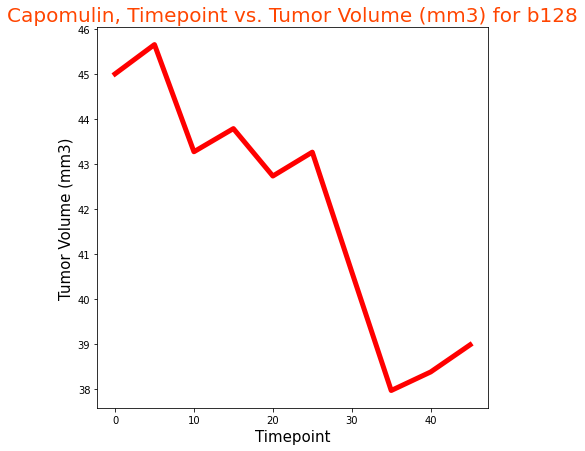

In [15]:
# Generate a line plot of Timepoint versus tumor volume for a mouse treated with Capomulin
regiment_grouped = clean_data.groupby('Drug Regimen')
capomulin_group = regiment_grouped.get_group('Capomulin')
capomulin_mouse = capomulin_group.groupby('Mouse ID')
index = list(capomulin_mouse.groups.keys())[0]
capomulin_mouse=capomulin_mouse.get_group(index)
plt.figure(figsize = (7,7))
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], color = 'r', linewidth = 5)
plt.xlabel('Timepoint', c='black', size = 15)
plt.ylabel('Tumor Volume (mm3)', c = 'black', size = 15)
plt.title('Capomulin, Timepoint vs. Tumor Volume (mm3) for ' + index, size = 20, color = "orangered")
plt.show()

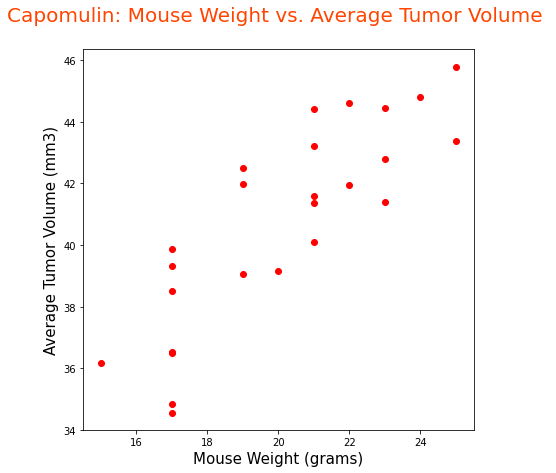

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
regiment_grouped = clean_data.groupby('Drug Regimen')
capomulin_group = regiment_grouped.get_group('Capomulin')
capomulin_mouse = capomulin_group.groupby('Mouse ID')
capomulin_mouse_groups = capomulin_mouse.groups
avg_vol = capomulin_mouse['Tumor Volume (mm3)'].mean()
capomulin_mouse_df = pd.concat([capomulin_mouse.get_group(name) for name in capomulin_mouse_groups.keys()])
capomulin_mouse_df_dd = capomulin_mouse_df.drop_duplicates('Mouse ID')
plt.figure(figsize = (7,7))
plt.scatter(capomulin_mouse_df_dd['Weight (g)'], avg_vol, color = 'red')
plt.xlabel('Mouse Weight (grams)', fontsize = 15)
plt.ylabel('Average Tumor Volume (mm3)', fontsize = 15)
plt.title('Capomulin: Mouse Weight vs. Average Tumor Volume \n', size = 20, c='orangered')
plt.show()

## Correlation and Regression

Correlation Coefficient: (0.8419363424694717, 1.322572243471279e-07)
Linear Regression: 0.7088568047708717
y = 0.95x + 21.55


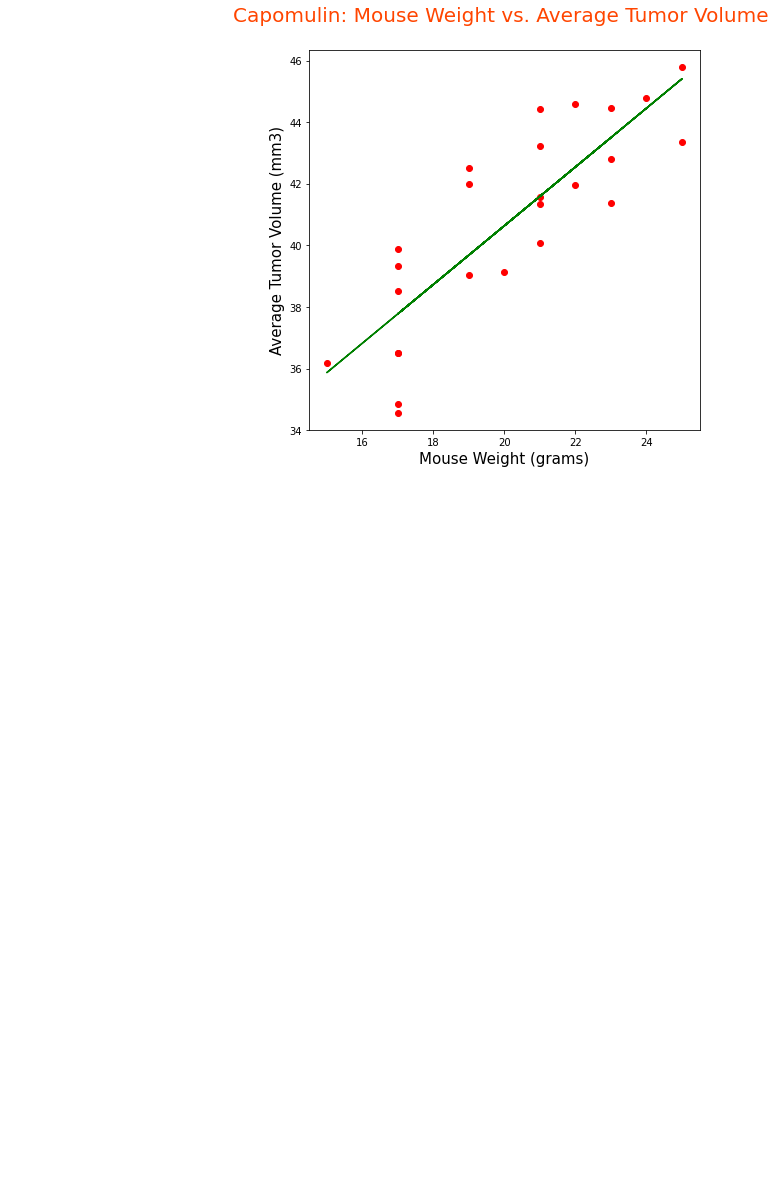

'Sources: https://stackoverflow.com/questions/19428029/how-to-get-correlation-of-two-vectors-in-python; https://stackoverflow.com/questions/55713811/linear-regression-of-2-lists-in-python/55714163; https://realpython.com/linear-regression-in-python/'

In [17]:
# Calculate Correlation Coefficient and Linear Regression model for mouse weight and average tumor volume for Capomulin regimen
corr_coeff = st.stats.pearsonr(capomulin_mouse_df_dd['Weight (g)'], avg_vol)
print('Correlation Coefficient:', corr_coeff)

slope, intercept, reg_value, p_value, std_err = st.linregress(capomulin_mouse_df_dd['Weight (g)'], avg_vol)
print('Linear Regression:', reg_value**2)

plt.figure(figsize = (7,7))
plt.scatter(capomulin_mouse_df_dd['Weight (g)'], avg_vol, color = 'red')
plt.xlabel('Mouse Weight (grams)', fontsize = 15)
plt.ylabel('Average Tumor Volume (mm3)', fontsize = 15)
plt.title('Capomulin: Mouse Weight vs. Average Tumor Volume \n', size = 20, c='orangered')
plt.plot(capomulin_mouse_df_dd['Weight (g)'],slope*capomulin_mouse_df_dd['Weight (g)']+intercept,color='green')
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq,(6,10), fontsize = 15, color = "red")
print(line_eq)
plt.show()

'Sources: https://stackoverflow.com/questions/19428029/how-to-get-correlation-of-two-vectors-in-python; https://stackoverflow.com/questions/55713811/linear-regression-of-2-lists-in-python/55714163; https://realpython.com/linear-regression-in-python/'